<a href="https://colab.research.google.com/github/rzeta0/From-Primes-To-Riemann/blob/main/sobel_mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sobel Filtered Mandelbrot Set **

"Make Your Own Mandelbrot" Second Edition

This work is licensed under CC BY-SA 4.0

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
# number of pixels wide and high
resolution = 1024

# bottom left corner of square viewport
bottom_left = complex(-2.25,-1.5)

# width and height of square viewport
size = 3

# maximum iterations per test
max_iter = 128

In [3]:
# create image as numpy arrray

image = np.full( (resolution,resolution), 255)

In [4]:
# test each point in viewport for divergence

# visit every pixel in the image array
for x in range(resolution):
  for y in range(resolution):

    # convert pixel grid location x,y to complex point c
    c = bottom_left + (size * complex(x/(resolution-1), y/(resolution-1)))

    # test for divergence
    z = complex(0,0)
    for iteration_count in range(1,max_iter+1):
      z = (z*z) + c
      if (abs(z)>2): break
      pass

    # colour pixel according to divergence
    image[y,x] = (255/15) * ((max_iter - iteration_count) % 16)

    pass # end y loop
  pass # end x loop

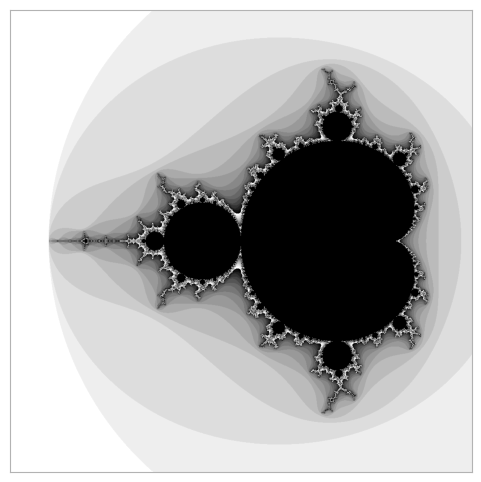

In [5]:
# render image

# create figure of size 6x6
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# grey outline
grey_value = str(0.7)
ax.spines['bottom'].set_color(grey_value)
ax.spines['top'].set_color(grey_value)
ax.spines['right'].set_color(grey_value)
ax.spines['left'].set_color(grey_value)

# plot image array, using grey colour palette
ax.imshow(image, cmap='gray', origin="lower")

# export the figure as a PNG image file
plt.savefig("mandelbrot_greyscale.png", dpi=600, format="png")

plt.show()

In [6]:
# create sobel filtered image

# horizontal and vertical gradients
dx = ndimage.sobel(image, 0)
dy = ndimage.sobel(image, 1)

# combine gradients into single magnitude
edge_image = np.hypot(dx, dy)

# rescale to 0-255 range
edge_image = edge_image * (255.0 / np.max(edge_image))

# invert colour
edge_image = 255 - edge_image

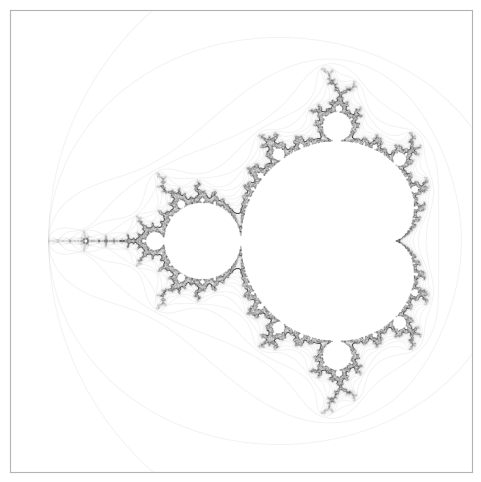

In [7]:
# render image

# create figure of size 6x6
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# grey outline
grey_value = str(0.7)
ax.spines['bottom'].set_color(grey_value)
ax.spines['top'].set_color(grey_value)
ax.spines['right'].set_color(grey_value)
ax.spines['left'].set_color(grey_value)

# plot image array, using grey colour palette
ax.imshow(edge_image, cmap='gray', origin="lower")

# export the figure as a PNG image file
plt.savefig("mandelbrot_sobel_greyscale.png", dpi=600, format="png")

plt.show()